In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('myexcel.csv')
df.head()

if 'Height' in df.columns:
    df['Height']=np.random.randint(150,181, size=len(df))
else:
    print("column height not found")

df['Height'].describe()
df.to_csv('Cleaned_dataset.csv',index = False)

In [25]:
df=pd.read_csv('Cleaned_dataset.csv')
team_distribution=df['Team'].value_counts()
team_percentage=df['Team'].value_counts(normalize=True)*100

print("Team distribution:\n",team_distribution)
print("\nTeam percentage:\n",team_percentage)

Team distribution:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team percentage:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies   

In [27]:
position_counts = df['Position'].value_counts()
print("Employee count by position:\n", position_counts)

Employee count by position:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [29]:
bins = [20, 30, 40, 50, 60]
labels = ['21-30', '31-40', '41-50', '51-60']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age'].value_counts()

Age
21-30    334
31-40    119
41-50      3
51-60      0
Name: count, dtype: int64

In [31]:
salary_group = df.groupby(['Team', 'Position'])['Salary'].sum().sort_values(ascending=False)
print("Highest salary expenditure:\n", salary_group.head(1))

Highest salary expenditure:
 Team                Position
Los Angeles Lakers  SF          31866445.0
Name: Salary, dtype: float64


Correlation between age and salary: 0.21


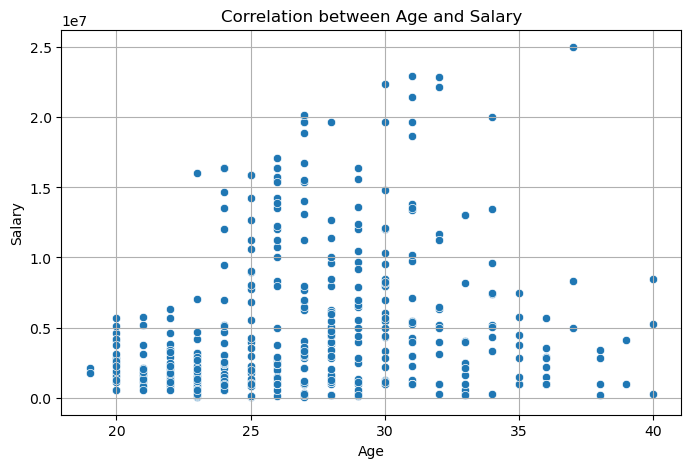

In [41]:
df=pd.read_csv('Cleaned_dataset.csv')
corr = df[['Age', 'Salary']].corr().loc['Age', 'Salary']
print(f"Correlation between age and salary: {corr:.2f}")

plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Correlation between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

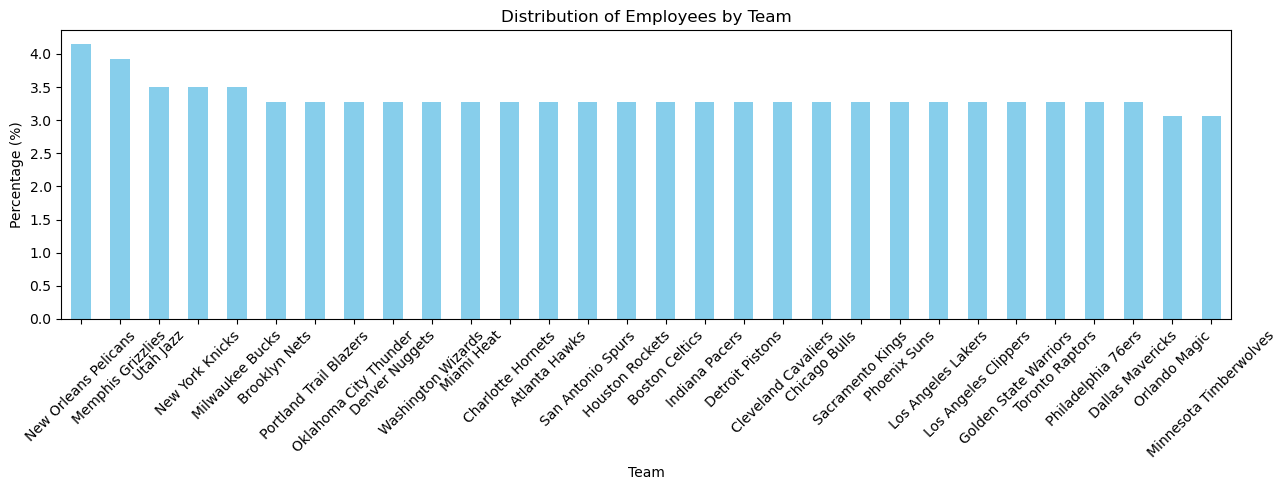

In [51]:
team_counts = df['Team'].value_counts(normalize=True) * 100

plt.figure(figsize=(13,5))
team_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Employees by Team")
plt.ylabel("Percentage (%)")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


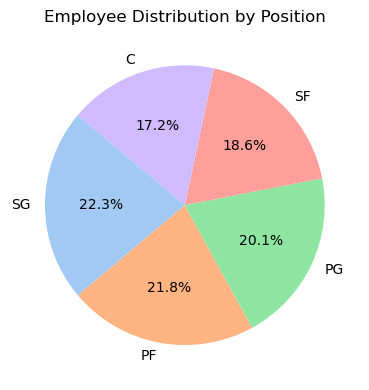

In [59]:
position_counts = df['Position'].value_counts()

plt.figure(figsize=(6,4))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Employee Distribution by Position")
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_30680\1930167987.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_df, x='Age', y='Count', palette='viridis')


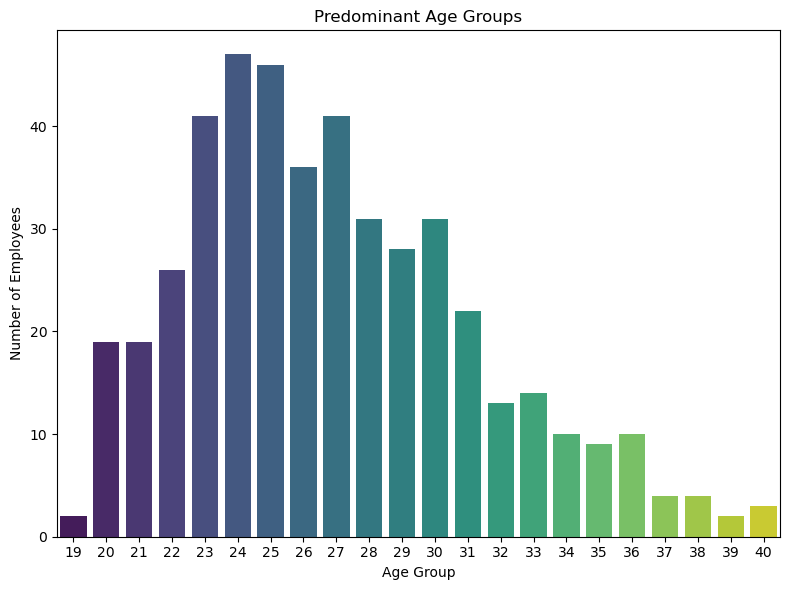

In [73]:
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['Age', 'Count']

plt.figure(figsize=(8,6))
sns.barplot(data=age_group_df, x='Age', y='Count', palette='viridis')
plt.title("Predominant Age Groups")
plt.ylabel("Number of Employees")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

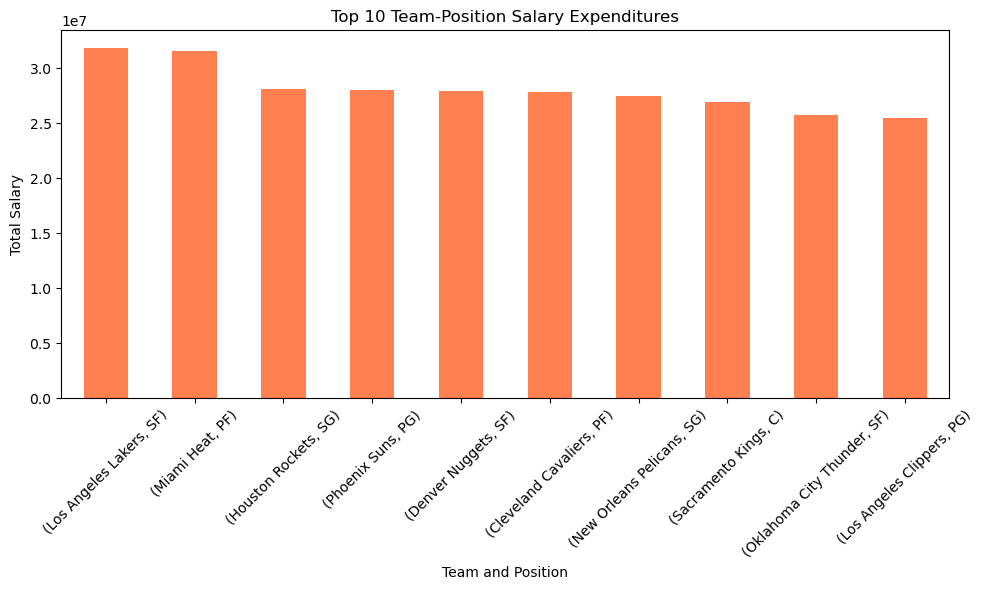

In [84]:
salary_by_team_position = df.groupby(['Team', 'Position'])['Salary'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
salary_by_team_position.plot(kind='bar', color='coral')
plt.title("Top 10 Team-Position Salary Expenditures")
plt.ylabel("Total Salary")
plt.xlabel("Team and Position")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation between age and salary: 0.21


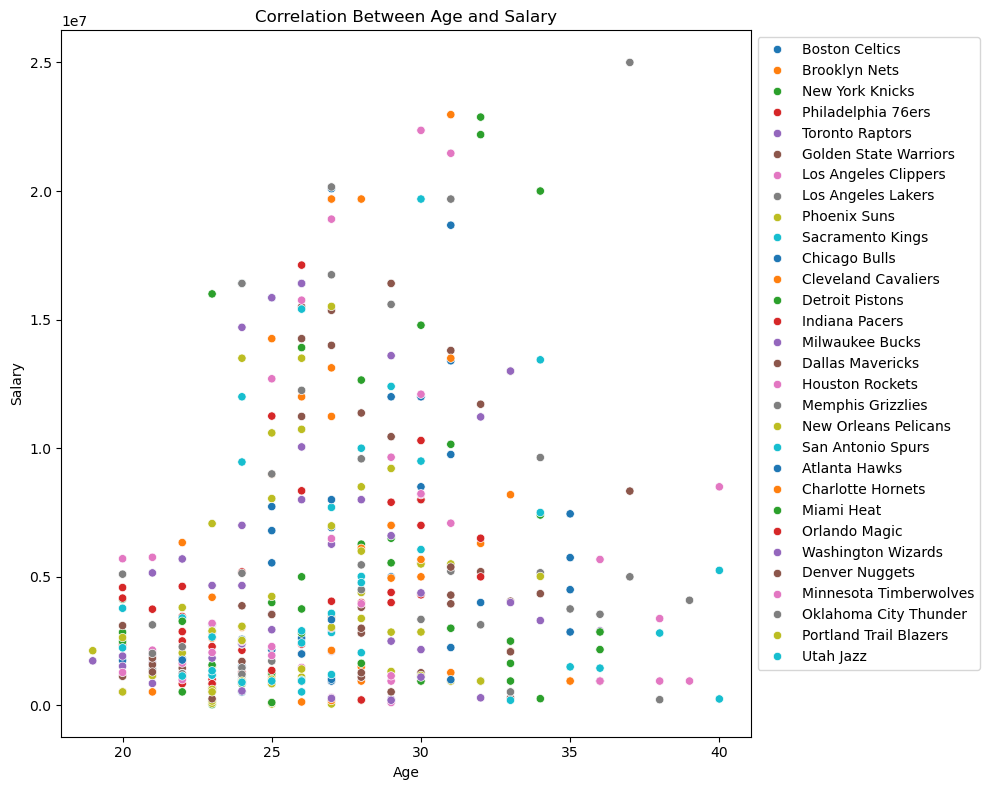

In [94]:
df=pd.read_csv('Cleaned_dataset.csv')
corr = df[['Age', 'Salary']].corr().loc['Age', 'Salary']
print(f"Correlation between age and salary: {corr:.2f}")


plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Team', palette='tab10')
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

DATA STORY:

1. TEAM DISTRIBUTION AND PERCENTAGE SPLIT

   From the Bar chart, we observe that the team distribution is fairly diverse, with some teams having significantly more employees than others. Teams with higher number of employees might be responsible for larger projects or have a broader scope. 

2. EMPLOYEE DISTRIBUTION BY POSITION

   INSIGHTS:The employee roles are well distributed across five key position. The distribution is relatively even, with the highest share in SG and the lowest in C.
   TREND: The spread suggests that ABC company maintains a balanced workforce across various skill levels and job functions,possibly to ensure strong performance in both foundational andspecialized tasksd.Slightly higher representation in positions like SG and PF may reflect strategic priorities in leadership or advanced roles.

3. PREDOMINENTB AGE GROUP

   INSIGHTS: The 22-31 age group has the highest number of employees,as shown bt the Bar plot. This group likely represents early-career professioinals.
   TREND: The dominance of the 22-32 age group indicates that ABC company investing in a young and dynamic workforce.This can benefit innovation and scalability but also requires a focus on training,mentorship, and lomg-term career development to retain talent.

4. HIGHEST SALARY EXPENDITURE BY TEAM AND POSITION

   INSIGHT: The combination of "Los Angeles Lakers - SF" and "MIami Heat-PF" shows the highest total salary expenditures,each slightly exceeding 30 million. These roles represent critical strategic or performance-heavy positions within top-tier teams.
   TREND: These high expenditures suggest these roles may house thev most experenced or high-performing employees.

5. CORRELATION BETWEEN SALARY AND AGE

   INSIGHT:The scatter plot shows a dense concentraion of employees in the 22 to 31 age range,with salaries mostly between 0 and 15 million. A few outliers in older age groups earn above 20 million ,suggesting that experience and seniority might lead to higher pay-but bonly for select individuals
   TREND: There is a slight upward trend in salary as age increases, indicating a moderate positive correlation.However, the spread is wide, meaning age alone does not guarantee a higher salary. Many younger employees also earn significant amounts, possibly due to high performance or key roles.